In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import time
import keyboard

def atualiza_grafico(x,y):
        # Plota os dados
    ax.clear()  # Limpa o eixo para evitar sobreposição
    ax.plot(x, y, marker='o', linestyle='-')
    
    # Adiciona título e rótulos
    ax.set_title('Gráfico em Tempo Real')
    ax.set_xlabel('Iteração')
    ax.set_ylabel('Menor Custo')
    
    # Exibe o gráfico
    display(fig)
    clear_output(wait=True)
    
    
    
    
    

def selection(population, cenario):
    K = cenario.shape[0]
    for i in population:
        ini = cenario.iloc[0]
        for j, day in cenario[1::].iterrows():
            i.cost += i.rms(ini,day)
            ini = day
        i.cost = i.cost/K
    selec = sorted(population, key=lambda x: x.cost)
    return selec
    
    
    
    
def generation(selected, N_population, epsilon = 0.1):
    delta = N_population - len(selected)
    
    new_population = selected.copy()
    
    for j in new_population:
        j.reset_cost()

    for i in range(delta):
        new_population.append(np.random.choice(new_population).procriate(epsilon = epsilon ))
        
    return new_population



class MarkovChain:
    def __init__(self, transition_matrix):
        """
        Inicializa a cadeia de Markov.

        Parameters:
        - transition_matrix: Uma matriz de transição de Markov.
        - initial_state: O estado inicial da cadeia.
        - score: pontuação da cadeia para um conjunto de valores de treino.
        """
        self.transition_matrix = transition_matrix
        self.current_state = np.array(np.zeros(len(transition_matrix)))
        self.score = 0
        self.cost = 0

    def transition(self):
        """
        Realiza uma transição de estado de acordo com a matriz de transição.
        """

        new_state = self.transition_matrix @ self.current_state
        self.current_state = new_state
    
    
    def sim(self, data):
        return self.transition_matrix @ data
    
   
    #=============================================================================================================
    def procriate(self, epsilon=0.1):
        """
        Cria uma nova cadeia de Markov baseada na cadeia existente.
        Uma pequena alteração aleatória é inserida em k elementos da matriz de transição.
        """
        M = self.transition_matrix.copy()

        # Escolhe uma posição aleatória na matriz
        row_idx = np.random.choice(M.shape[0])
        col_idx = np.random.choice(M.shape[1])

        # Gera uma alteração aleatória proporcional à posição escolhida
        # perturbation = np.random.uniform(epsilon*0.1, epsilon)
        perturbation = epsilon
        
        # Seleciona a coluna que será mudada
        col = M[:,col_idx]
        
        # incrementa a perturbação na linha sortiada
        col[row_idx] += perturbation
        
        # Regulariza a coluna para que sua soma dê 1
        col = col/col.sum()
        M[:,col_idx] = col
        
        return MarkovChain(M)
    #=============================================================================================================
    
    def rms(self, data_in, data_out):
        """
        Retorna o desvio quadrado da simulação de uma transição em relação
        aos dados de entrada e saida fornecidos.
        """
        simu = self.transition_matrix @ data_in
        return np.sqrt((data_out-simu)**2).sum()/len(data_in)
    
    def reset_cost(self):
        self.cost = 0
    


In [2]:
dados = pd.read_csv(r"C:\Users\usuario\OneDrive\Área de Trabalho\programas\MarkovChainModel\Data\Dados-B3-2015-2023.csv")
print(dados.shape)
dados

(1020, 65)


,ABEV3,ALPA4,AMAR3,AZUL4,B3SA3,BBAS3,BBDC3,BBSE3,BRFS3,CCRO3,...,TIMS3,TOTS3,TRPL4,UGPA3,UNIP6,USIM5,VALE3,VBBR3,VIVA3,WEGE3
0,16.175148,32.171562,61.566326,58.799999,12.993602,41.380939,21.815145,27.180847,35.880001,17.265608,...,13.153618,22.065266,16.107874,23.327459,22.589605,8.030857,38.042187,24.616976,28.120041,16.706278
1,15.947683,32.171562,63.807598,56.759998,12.619149,41.311714,21.474731,26.881218,35.939999,17.074780,...,13.178642,22.534334,15.704646,23.054087,21.632040,7.948065,37.762108,24.472828,27.946579,16.492947
2,16.023504,31.667952,62.343910,55.000000,12.498170,40.765606,21.351559,27.323530,35.570000,16.638594,...,13.161960,22.020592,15.796614,22.552912,22.171871,7.799039,37.538044,23.247589,27.455105,16.535610
3,16.057203,32.388798,62.526871,56.820000,12.901430,40.457947,20.988214,27.337799,35.160000,17.011168,...,13.303758,22.113131,15.683423,23.054087,22.017633,7.873553,37.811123,23.215557,26.886538,16.663609
4,15.981381,32.744289,63.441677,56.919998,12.866864,40.088737,20.667973,27.323530,36.509998,16.893036,...,13.445554,21.816376,15.563162,22.871843,22.814535,7.774201,37.818127,23.103443,26.934719,16.033098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,13.070000,8.400000,2.550000,13.250000,13.290000,57.740002,13.722750,34.310001,14.330000,13.220000,...,17.670000,32.020000,25.790001,28.459999,69.940002,9.230000,67.449997,23.480000,34.080002,32.630001
1016,13.070000,8.290000,2.570000,13.730000,13.170000,57.720001,13.640000,34.090000,14.330000,13.150000,...,17.700001,31.680000,25.850000,27.639999,69.160004,9.090000,66.080002,23.330000,33.090000,32.590000
1017,13.090000,8.070000,2.540000,12.910000,13.070000,58.340000,13.910000,34.549999,14.490000,13.110000,...,17.889999,31.790001,26.110001,28.180000,69.300003,9.090000,65.510002,23.660000,32.549999,33.259998
1018,13.230000,8.220000,2.610000,13.400000,13.210000,59.599998,14.520000,35.500000,14.850000,13.140000,...,18.139999,32.349998,26.850000,28.350000,69.199997,9.220000,66.669998,23.950001,32.410000,33.240002


In [3]:
n = dados.shape[1] #Número de features nos dados
N = 80 #Número máximo de indívíduos por geração
M = 10 #Número de indivíduos selecionados em uma geração

check_point = 100

population = generation([MarkovChain(np.ones((n,n))/n)],N*3,0.5)

#anterior = np.loadtxt(r'C:\Users\usuario\OneDrive\Área de Trabalho\stonks\Modelos\Ajuste_F50-B-035.txt', delimiter=',')
#population = generation([MarkovChain(anterior)],N)

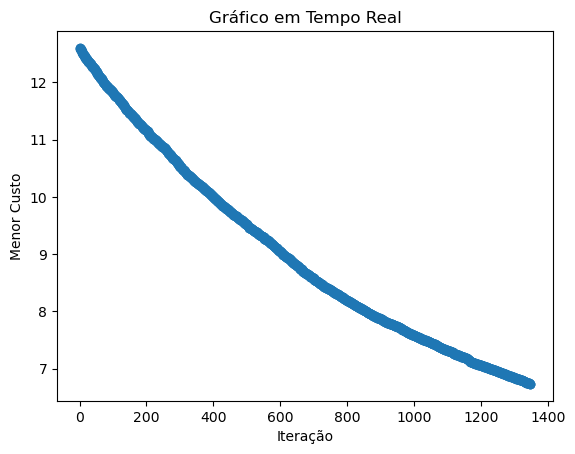

In [ ]:


# Cria uma figura e um eixo para o gráfico
fig, ax = plt.subplots()

# Loop para atualizar o gráfico
itera = 0
x = []
y = []


while True:    
    selec = selection(population,dados)[0:M]
    cost = selec[0].cost
    population = generation(selec,N,0.01)
    
    x.append(itera)
    y.append(cost)
    atualiza_grafico(x,y)

    itera += 1

    if ( (itera % check_point) == 0): 
        caminho_arquivo = r"C:\Users\usuario\OneDrive\Área de Trabalho\programas\MarkovChainModel\Fits\Ajuste_F62-{}.txt".format(str(int(itera/check_point)).zfill(3))
        np.savetxt(caminho_arquivo, population[0].transition_matrix, fmt='%f', delimiter=',')
            

# Fecha a figura ao final do loop
plt.close(fig)
